In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


**DATA DESCRIPTION**

1.sl_no ----> Serial Number

2.gender ---> Gender- Male='M',Female='F'

3.ssc_p ---> Secondary Education percentage- 10th Grade

4.ssc_b ---> Board of Education- Central/ Others

5.hsc_p ---> Higher Secondary Education percentage- 12th Grade

6.hsc_b ---> Board of Education- Central/ Others

7.hsc_s ---> Specialization in Higher Secondary Education

8.degree_p ---> Degree Percentage

9.degree_t ---> Under Graduation(Degree type)- Field of degree education

10.workex ---> Work Experience

11.etest_p ---> Employability test percentage ( conducted by college)

12.specialisation ---> Post Graduation(MBA)- Specialization

13.mba_p ---> MBA percentage

14.status ---> Status of placement- Placed/Not placed

15.salary ---> Salary offered by corporate to candidates

**IMPORTING DATASET**

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Dropping "sl_no" column as it is of no use in prediction

In [4]:
df=df.drop("sl_no",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We will replace all the nan values because it is a dataset of placementand all the nan values are present at locations where 

In [8]:
df["salary"]=df["salary"].fillna(0)

In [9]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
df.shape

(215, 14)

In [11]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Checking the different unique values in the categorical features.

In [12]:
cat_cols=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]

In [13]:
for i in cat_cols:
    print(i,df[i].unique())

gender ['M' 'F']
ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


**DATA VISUALISATION**

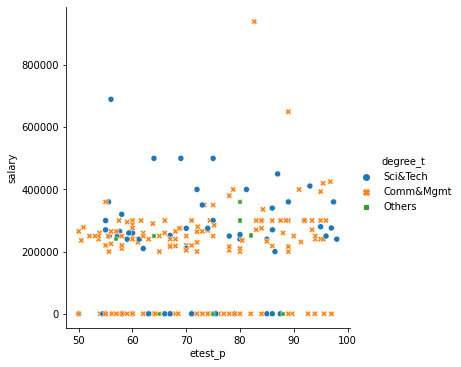

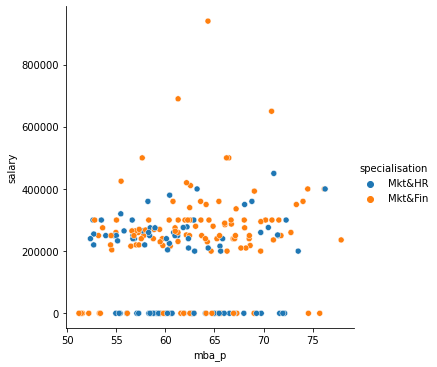

In [14]:
sns.relplot("etest_p","salary",data=df,hue="degree_t",style="degree_t")
sns.relplot("mba_p","salary",data=df,hue="specialisation")

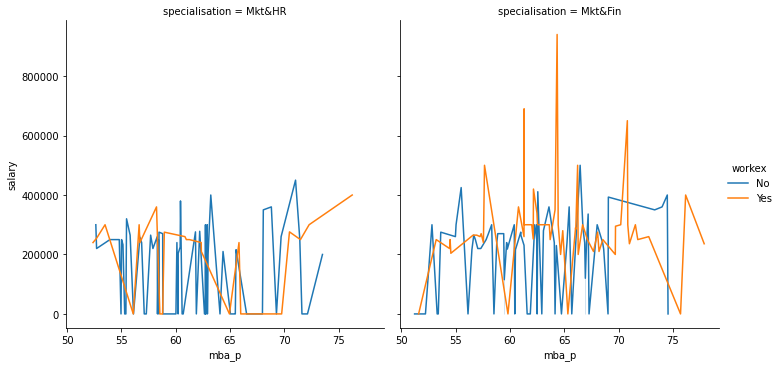

In [15]:
sns.relplot("mba_p","salary",data=df,kind="line",col="specialisation",hue="workex")

Here, we can see that when the "specialisation" is "Mkt&Fin" then the salary of most of the candidates is high.

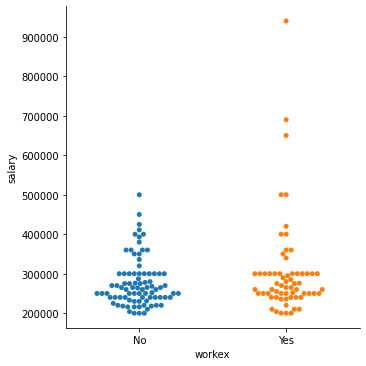

In [16]:
sns.catplot("workex","salary",data=df.query("salary>10000"),kind="swarm")

When a candidate is having work experience the salary is a bit better.

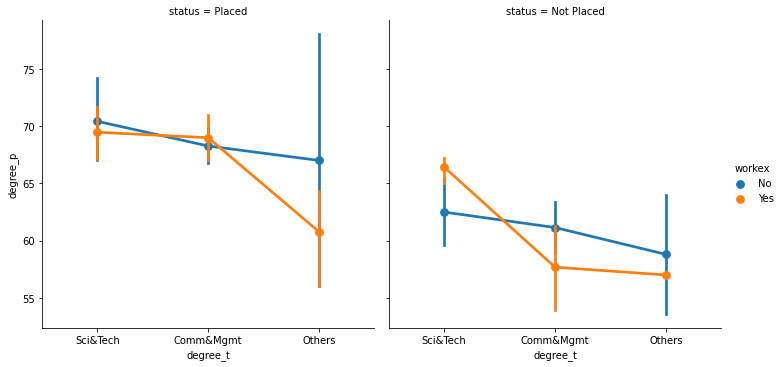

In [17]:
sns.catplot(x="degree_t",y="degree_p",data=df,kind="point",hue="workex",col="status")

Candidates who are having a high percentage in degree college have a better cance of placement than the candidates who are having low percentage in degree college.

Text(0.5, 1.0, 'Post Graduation(MBA)- Specialization')

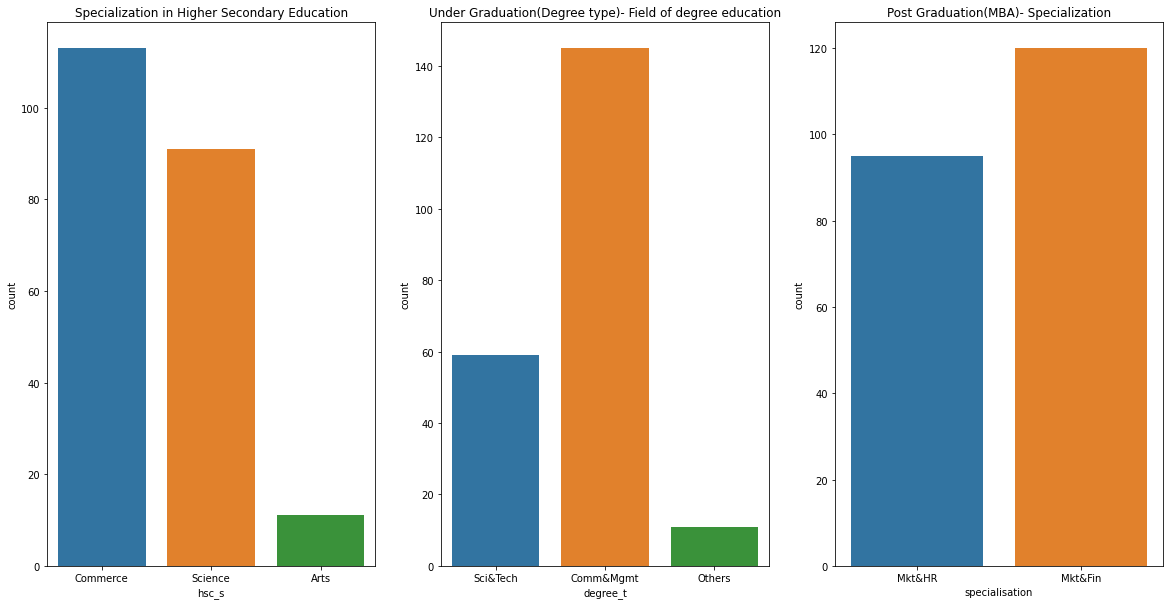

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.countplot(df["hsc_s"])
plt.title("Specialization in Higher Secondary Education")



plt.subplot(132)
sns.countplot(df["degree_t"])
plt.title("Under Graduation(Degree type)- Field of degree education")


plt.subplot(133)
sns.countplot(df["specialisation"])
plt.title("Post Graduation(MBA)- Specialization")

As we can see most the people chose commerce side in high school (12th) and also in the degree college.

And in MBA colleges the widely selected specialisation field is "Mkt&Fin"

Text(0.5, 1.0, 'MBA percentage')

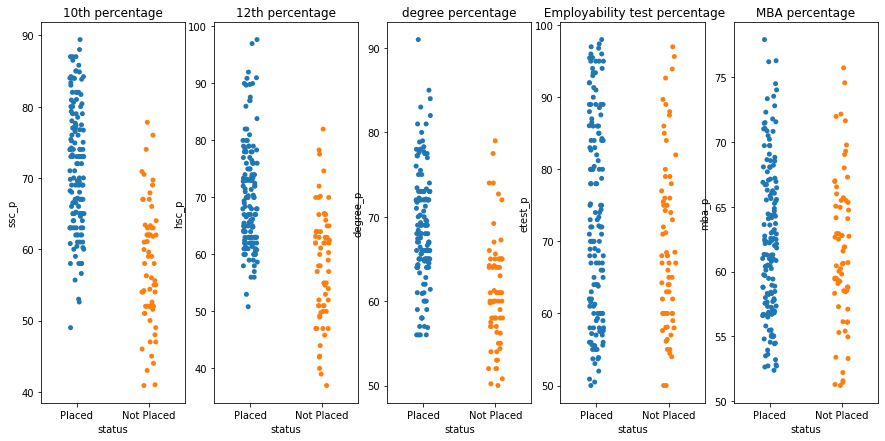

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(151)
sns.stripplot(x='status', y='ssc_p', data=df)
plt.title("10th percentage")

plt.subplot(152)
sns.stripplot(x='status', y='hsc_p', data=df)
plt.title("12th percentage")


plt.subplot(153)
sns.stripplot(x='status', y='degree_p', data=df)
plt.title("degree percentage")


plt.subplot(154)
sns.stripplot(x='status', y='etest_p', data=df)
plt.title(" Employability test percentage")



plt.subplot(155)
sns.stripplot(x='status', y='mba_p', data=df)
plt.title("MBA percentage")

As we can clearly see that the density of blue dots increase when the percentage increases. So it is very clear that more the percentage ,more the chances of getting placement.

<AxesSubplot:xlabel='gender', ylabel='salary'>

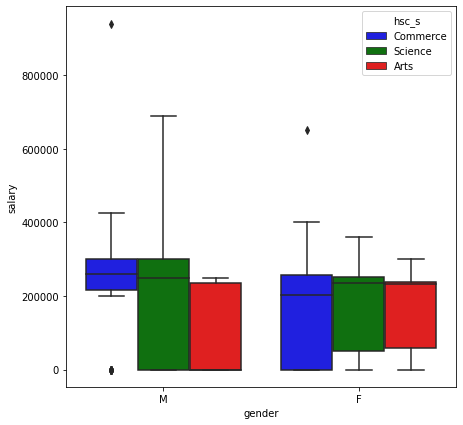

In [20]:
plt.figure(figsize=(7,7))
sns.boxplot(x='gender', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red'])

Salaries of both the gender are almost same but the science field has a better hand in this as highest salary is from science department.

<AxesSubplot:>

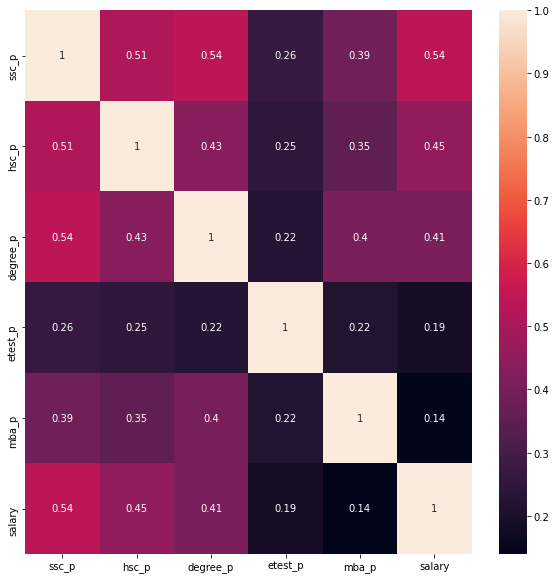

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

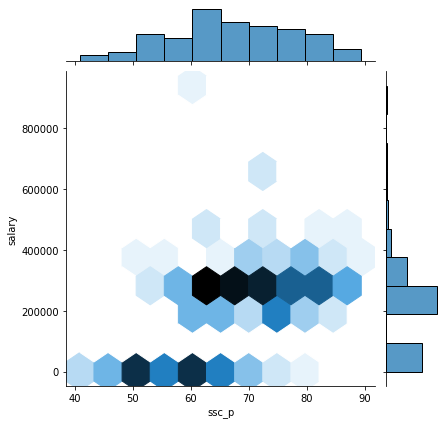

In [22]:
sns.jointplot("ssc_p","salary",data=df,kind="hex")

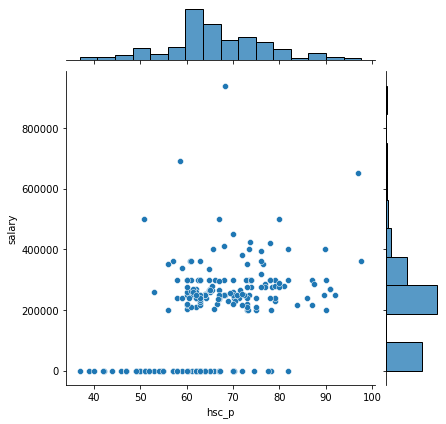

In [23]:
sns.jointplot("hsc_p","salary",data=df)

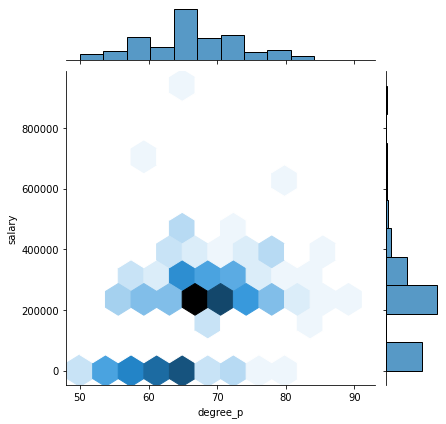

In [24]:
sns.jointplot("degree_p","salary",data=df,kind="hex")

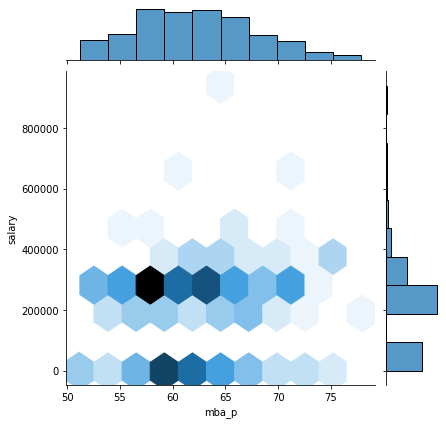

In [25]:
sns.jointplot("mba_p","salary",data=df,kind="hex")

As we saw from the above visualisations we see that salary of the people is mostly in the range of 20k to 40k. And candidates getting placed are also having percentage in the range of 50-75. As we see that salary is increasing with increase in percentage but there are some exceptional candidates who are having a very high salary and not high percentage.

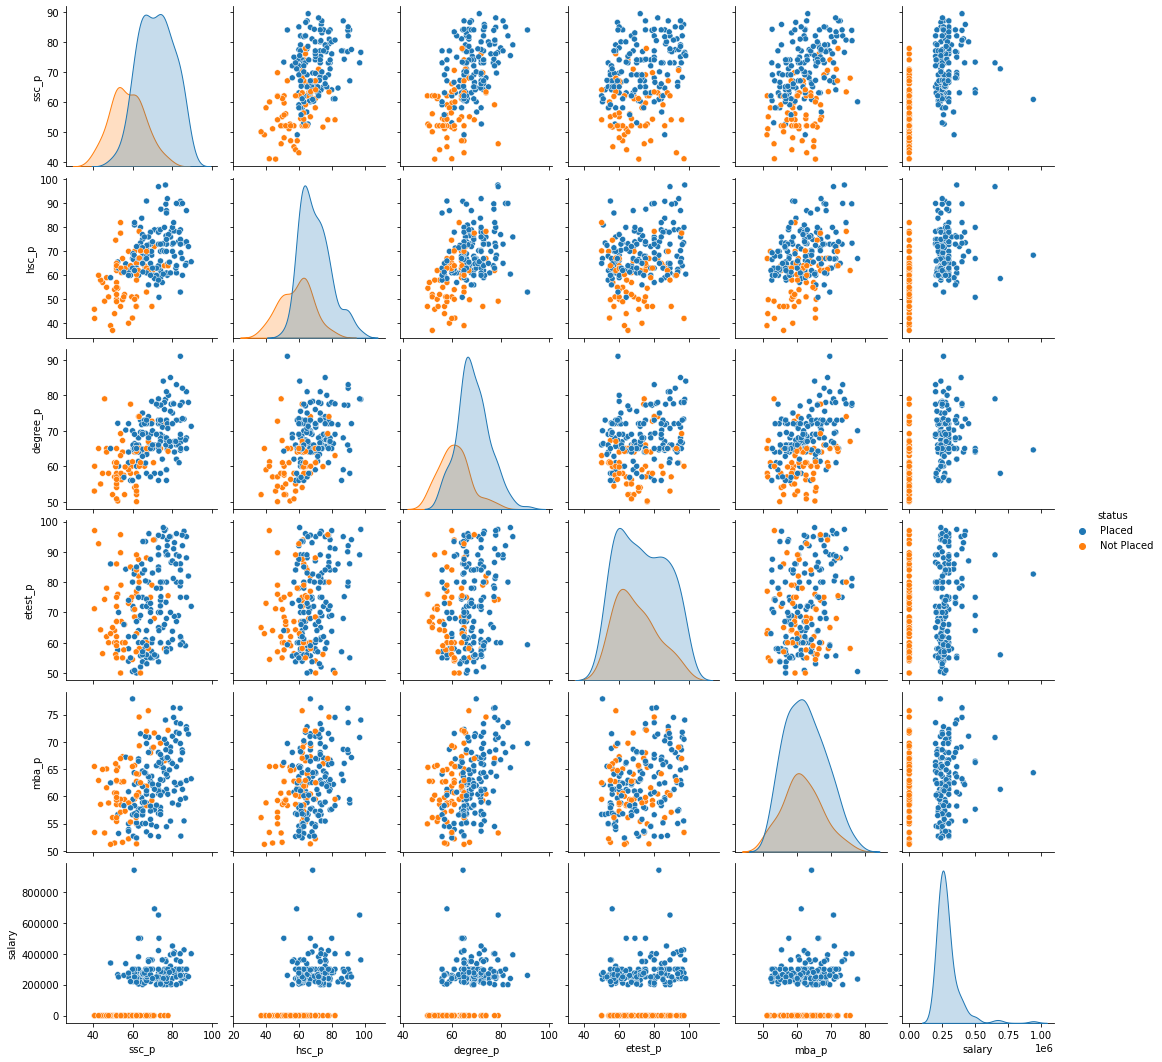

In [26]:
sns.pairplot(df,hue="status")

**As we have status and salary which both can be predicted. So we will try both the approaches to predict classification:"status" and regression:"salary".**

**REGRESSION APPROACH**

**Label Encoding the categorical values**

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i]) 

**Feature Scaling**


As there are some of the features having values higher than the others. So we will apply standard scaler to bring of all them in a similar range. by this our prediction will become better.

In [28]:
from sklearn.preprocessing import StandardScaler
scaling=["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
sc = StandardScaler()
scaled=sc.fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
scaled = pd.DataFrame(scaled,columns=scaling)
df=df.drop(columns=scaling,axis=1)
df=df.merge(scaled, left_index=True, right_index=True, how = "right")

In [29]:
df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,1,1,1,2,0,1,1,270000.0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1,0,1,2,2,1,0,1,200000.0,1.113369,1.103448,1.513267,1.087157,0.687620
2,1,0,0,0,0,0,0,1,250000.0,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,1,0,0,2,2,0,1,0,0.0,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1,0,0,1,0,0,0,1,425000.0,1.712332,0.668391,0.943909,1.864806,-1.164676


**Splitting the dataset into dependent and independent variable**

In [30]:
x=df.drop(['salary'],axis=1)
y=df.salary

**Train Test Split**

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Training the dataset on Random Forest Regression**

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

**Checking accuracy**

In [33]:
regressor.score(x_test,y_test)

0.7658270779096545

**K-Fold cross validation**

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 66.73 %
Standard Deviation: 16.29 %


**Training the dataset on Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
regressor_2 = LinearRegression()
regressor_2.fit(x_train, y_train)

LinearRegression()

**Checking the accuracy**

In [36]:
regressor_2.score(x_test,y_test)

0.880344102260594

**K-Fold Cross Validation**

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_2, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.24 %
Standard Deviation: 13.11 %


**ACCURACY**


**Random Forest Regression**
 : before cross validation - 76%
, after cross validation - 66%




**Linear Regression**
 : before cross validation - 88%%
, after cross validation - 74%


**CLASSIFICTION APPROACH**

As "salary" column is of no use to us now. So we drop it.

In [38]:
df=df.drop("salary",axis=1)

In [39]:
df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,1,1,1,2,0,1,1,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1,0,1,2,2,1,0,1,1.113369,1.103448,1.513267,1.087157,0.687620
2,1,0,0,0,0,0,0,1,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,1,0,0,2,2,0,1,0,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1,0,0,1,0,0,0,1,1.712332,0.668391,0.943909,1.864806,-1.164676


**Splitting the dataset into dependent and independent variable**

In [40]:
X=df.drop("status",axis=1)
Y=df.status

**Splitting the dataset into Training and Test set**

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

**Training the dataset on Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

**Checking the accuracy by accuracy matrix**

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = lr.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[11  5]
 [ 3 24]]


0.813953488372093

**K-Fold cross validation**

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.92 %
Standard Deviation: 6.70 %


**Training the dataset on Random Forest Classifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

**Checking the accuracy by accuracy matrix**

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[ 8  8]
 [ 4 23]]


0.7209302325581395

**K-Fold cross Validation**

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.89 %
Standard Deviation: 7.23 %


**ACCURACY**


**Logistic Regression**
 : before cross validation - 81%
, after cross validation - 88.9%




**Random Forest Classification**
 : before cross validation - 72%
, after cross validation - 88.89%
